# Runtime Telemetry Analysis for ML Inference Workloads

This notebook analyzes CPU and memory telemetry collected during ML inference on CPU.
We study runtime behavior across different phases:
- Model initialization
- Warm-up inference
- Steady-state inference
- Idle

Models analyzed:
- ResNet-18 (CNN)
- LSTM (sequence model)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("/Users/rishabhchauhan/pyth/cpu-ml-profiling/results/telemetry_resnet_vs_lstm.csv")

In [3]:
df.head()

,timestamp,phase,cpu_percent,memory_mb
0,1.770748e+09,model_init,46.5,301.035156
1,1.770748e+09,model_init,37.6,301.039062
2,1.770748e+09,model_init,51.8,301.039062
3,1.770748e+09,model_init,54.3,301.039062
4,1.770748e+09,model_init,38.1,301.039062


In [4]:
df.shape

(90, 4)

In [5]:
df["time_sec"] = df["timestamp"] - df["timestamp"].min()

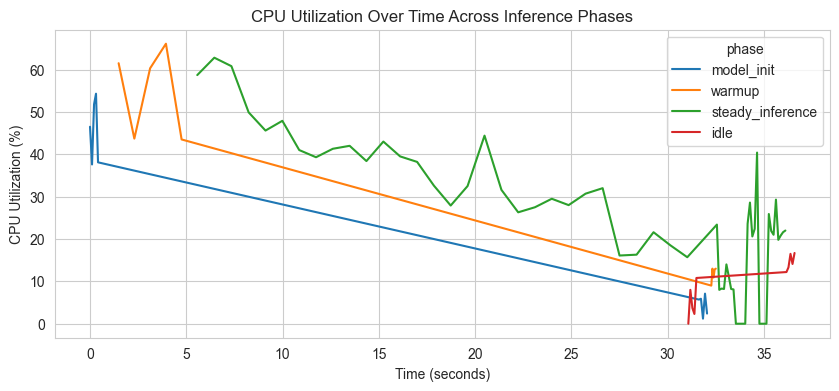

In [6]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x="time_sec", y="cpu_percent", hue="phase")
plt.xlabel("Time (seconds)")
plt.ylabel("CPU Utilization (%)")
plt.title("CPU Utilization Over Time Across Inference Phases")
plt.show()


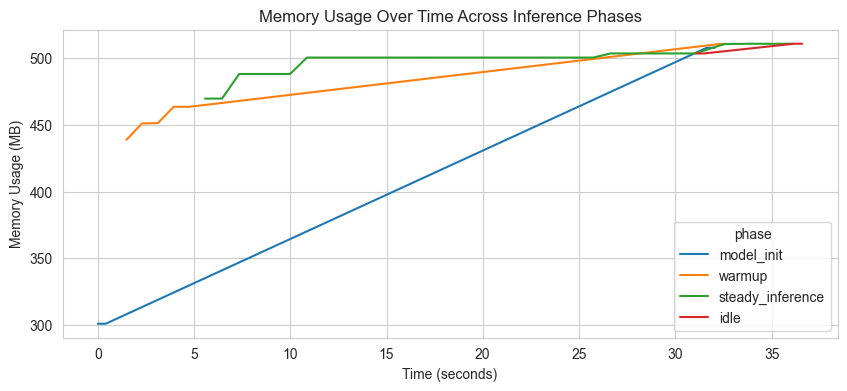

In [7]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x="time_sec", y="memory_mb", hue="phase")
plt.xlabel("Time (seconds)")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage Over Time Across Inference Phases")
plt.show()

## Key Observations (Runtime Telemetry)
- Memory usage increases across inference phases and does not fully release during idle, indicating persistent allocations and framework-level caching behavior.
- Warm-up inference causes brief CPU utilization spikes, reflecting kernel initialization and memory setup before steady execution.
- Steady-state inference shows sustained but fluctuating CPU usage, highlighting real-world scheduling and cache effects on CPU workloads.
- Model initialization incurs measurable CPU and memory cost, confirming it as a distinct and non-negligible runtime phase.
- Idle phase exhibits low CPU usage with stable memory, validating correct phase tagging and separation.

### Phase-aware telemetry reveals warm-up CPU spikes, sustained inference load, and persistent memory allocation during CPU-based ML inference.